In [110]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [111]:
df = pd.read_csv('car_data.csv')

In [112]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [114]:
df.Transmission.value_counts(), df.Fuel_Type.value_counts(), df.Seller_Type.value_counts(), df.Transmission.value_counts(), df.Owner.value_counts(), df.Year.value_counts()

(Manual       261
 Automatic     40
 Name: Transmission, dtype: int64,
 Petrol    239
 Diesel     60
 CNG         2
 Name: Fuel_Type, dtype: int64,
 Dealer        195
 Individual    106
 Name: Seller_Type, dtype: int64,
 Manual       261
 Automatic     40
 Name: Transmission, dtype: int64,
 0    290
 1     10
 3      1
 Name: Owner, dtype: int64,
 2015    61
 2016    50
 2014    38
 2017    35
 2013    33
 2012    23
 2011    19
 2010    15
 2008     7
 2009     6
 2006     4
 2005     4
 2003     2
 2007     2
 2018     1
 2004     1
 Name: Year, dtype: int64)

In [115]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [116]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Now we have to remove bike entries from the dataset

In [117]:
df[df['Car_Name'].str.contains('Honda')]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
128,Honda CB Hornet 160R,2017,0.80,0.870,3000,Petrol,Individual,Manual,0
130,Honda CB Hornet 160R,2017,0.75,0.870,11000,Petrol,Individual,Manual,0
136,Honda CBR 150,2014,0.65,1.200,23500,Petrol,Individual,Manual,0
138,Honda CB Hornet 160R,2016,0.60,0.870,15000,Petrol,Individual,Manual,0
140,Honda CBR 150,2013,0.60,1.200,32000,Petrol,Individual,Manual,0
155,Honda Activa 4G,2017,0.48,0.510,4300,Petrol,Individual,Automatic,0
158,Honda Dream Yuga,2017,0.48,0.540,8600,Petrol,Individual,Manual,0
159,Honda Activa 4G,2017,0.45,0.510,4000,Petrol,Individual,Automatic,0
168,Honda CB Trigger,2013,0.42,0.730,12000,Petrol,Individual,Manual,0
174,Honda CB Unicorn,2015,0.38,0.720,38600,Petrol,Individual,Manual,0


In [118]:
df[df['Car_Name'].str.contains('TVS')]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
134,TVS Apache RTR 160,2017,0.65,0.810,11800,Petrol,Individual,Manual,0
145,TVS Apache RTR 160,2012,0.60,0.810,19000,Petrol,Individual,Manual,0
150,TVS Apache RTR 180,2011,0.50,0.826,6000,Petrol,Individual,Manual,0
156,TVS Sport,2017,0.48,0.520,15000,Petrol,Individual,Manual,0
161,TVS Apache RTR 180,2014,0.45,0.826,23000,Petrol,Individual,Manual,0
167,TVS Apache RTR 160,2014,0.42,0.810,42000,Petrol,Individual,Manual,0
178,TVS Jupyter,2014,0.35,0.520,19000,Petrol,Individual,Automatic,0
186,TVS Wego,2010,0.25,0.520,22000,Petrol,Individual,Automatic,0


In [119]:
df[df['Car_Name'].str.contains('Royal')]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
100,Royal Enfield Thunder 500,2016,1.75,1.90,3000,Petrol,Individual,Manual,0
104,Royal Enfield Classic 350,2017,1.35,1.47,4100,Petrol,Individual,Manual,0
107,Royal Enfield Thunder 350,2013,1.25,1.50,15000,Petrol,Individual,Manual,0
108,Royal Enfield Thunder 350,2016,1.20,1.50,18000,Petrol,Individual,Manual,0
109,Royal Enfield Classic 350,2017,1.20,1.47,11000,Petrol,Individual,Manual,0
111,Royal Enfield Thunder 350,2016,1.15,1.50,8700,Petrol,Individual,Manual,0
114,Royal Enfield Classic 350,2015,1.15,1.47,17000,Petrol,Individual,Manual,0
115,Royal Enfield Classic 350,2015,1.11,1.47,17500,Petrol,Individual,Manual,0
116,Royal Enfield Classic 350,2013,1.10,1.47,33000,Petrol,Individual,Manual,0
117,Royal Enfield Thunder 500,2015,1.10,1.90,14000,Petrol,Individual,Manual,0


In [120]:
df[df['Car_Name'].str.contains('Yamaha')]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
129,Yamaha FZ S V 2.0,2017,0.78,0.84,5000,Petrol,Individual,Manual,0
131,Yamaha FZ 16,2015,0.75,0.82,18000,Petrol,Individual,Manual,0
142,Yamaha FZ v 2.0,2015,0.60,0.84,29000,Petrol,Individual,Manual,0
143,Yamaha FZ v 2.0,2016,0.60,0.84,25000,Petrol,Individual,Manual,0
147,Yamaha FZ S V 2.0,2015,0.55,0.84,58000,Petrol,Individual,Manual,0
154,Yamaha Fazer,2014,0.50,0.88,8000,Petrol,Individual,Manual,0
157,Yamaha FZ S V 2.0,2015,0.48,0.84,23000,Petrol,Individual,Manual,0
170,Yamaha FZ S,2012,0.40,0.83,5500,Petrol,Individual,Manual,0


In [121]:
df[df['Car_Name'].str.contains('KTM')]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
102,KTM RC200,2017,1.65,1.78,4000,Petrol,Individual,Manual,0
105,KTM RC390,2015,1.35,2.37,21700,Petrol,Individual,Manual,0
110,KTM RC200,2016,1.20,1.78,6000,Petrol,Individual,Manual,0
112,KTM 390 Duke,2014,1.15,2.40,7000,Petrol,Individual,Manual,0


In [122]:
df[df['Car_Name'].str.contains('Bajaj')]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
103,Bajaj Dominar 400,2017,1.45,1.60,1200,Petrol,Individual,Manual,0
120,Bajaj Pulsar RS200,2016,1.05,1.26,5700,Petrol,Individual,Manual,0
126,Bajaj Avenger 220,2017,0.90,0.95,1300,Petrol,Individual,Manual,0
127,Bajaj Avenger 150,2016,0.75,0.80,7000,Petrol,Individual,Manual,0
132,Bajaj Avenger 220,2017,0.75,0.95,3500,Petrol,Individual,Manual,0
133,Bajaj Avenger 220,2016,0.72,0.95,500,Petrol,Individual,Manual,0
135,Bajaj Pulsar 150,2015,0.65,0.74,5000,Petrol,Individual,Manual,0
139,Bajaj Avenger 220 dtsi,2015,0.60,0.95,16600,Petrol,Individual,Manual,0
141,Bajaj Avenger 150 street,2016,0.60,0.80,20000,Petrol,Individual,Manual,0
144,Bajaj Pulsar NS 200,2014,0.60,0.99,25000,Petrol,Individual,Manual,0


In [123]:
df[df['Car_Name'].str.contains('Hero')]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
137,Hero Extreme,2013,0.65,0.787,16000,Petrol,Individual,Manual,0
146,Hero Extreme,2014,0.55,0.787,15000,Petrol,Individual,Manual,0
151,Hero Passion X pro,2016,0.50,0.550,31000,Petrol,Individual,Manual,0
164,Hero Splender iSmart,2016,0.45,0.540,14000,Petrol,Individual,Manual,0
166,Hero Passion Pro,2016,0.45,0.550,1000,Petrol,Individual,Manual,0
169,Hero Splender iSmart,2015,0.40,0.540,14000,Petrol,Individual,Manual,0
171,Hero Passion Pro,2015,0.40,0.550,6700,Petrol,Individual,Manual,0
175,Hero Honda CBZ extreme,2011,0.38,0.787,75000,Petrol,Individual,Manual,0
180,Hero Honda Passion Pro,2012,0.30,0.510,60000,Petrol,Individual,Manual,0
181,Hero Splender Plus,2016,0.30,0.480,50000,Petrol,Individual,Manual,0


In [124]:
df[df['Car_Name'].str.contains('Suzuki')]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
185,Suzuki Access 125,2008,0.25,0.58,1900,Petrol,Individual,Automatic,0


In [125]:
df[df['Car_Name'].str.contains('Activa')]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
155,Honda Activa 4G,2017,0.48,0.51,4300,Petrol,Individual,Automatic,0
159,Honda Activa 4G,2017,0.45,0.51,4000,Petrol,Individual,Automatic,0
165,Activa 3g,2016,0.45,0.54,500,Petrol,Individual,Automatic,0
173,Activa 4g,2017,0.40,0.51,1300,Petrol,Individual,Automatic,0
177,Honda Activa 125,2016,0.35,0.57,24000,Petrol,Individual,Automatic,0
196,Activa 3g,2008,0.17,0.52,500000,Petrol,Individual,Automatic,0


In [126]:
df[df['Car_Name'].str.contains('Mahindra')]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
113,Mahindra Mojo XT300,2016,1.15,1.4,35000,Petrol,Individual,Manual,0


In [127]:
bikes = ['Honda','Activa','KTM','Royal','Activa','TVS','Mahindra','Bajaj','Yamaha', 'Suzuki', 'Hero', 'UM','Hyosung']
for bike in bikes:
    df = df[~df['Car_Name'].str.contains(bike)]

In [128]:
df.Car_Name.value_counts()

city             26
corolla altis    16
verna            14
fortuner         11
brio             10
ciaz              9
innova            9
i20               9
grand i10         8
jazz              7
amaze             7
sx4               6
ertiga            6
eon               6
alto k10          5
i10               5
swift             5
etios liva        4
ritz              4
dzire             4
wagon r           4
xcent             3
creta             3
etios g           3
etios cross       3
elantra           2
land cruiser      1
baleno            1
800               1
ignis             1
omni              1
camry             1
etios gd          1
alto 800          1
s cross           1
vitara brezza     1
corolla           1
Name: Car_Name, dtype: int64

<AxesSubplot:xlabel='Selling_Price', ylabel='Seller_Type'>

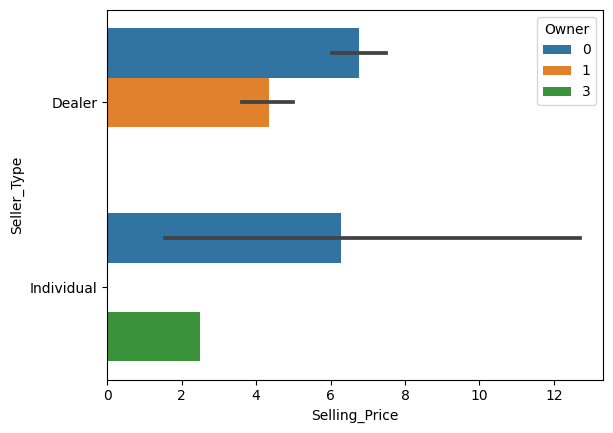

In [129]:
sns.barplot(df, x = df.Selling_Price, y = df.Seller_Type, hue = df.Owner)

Dealer Mostly handles new and single owner cars which is preferred by buyers.

<AxesSubplot:xlabel='Selling_Price', ylabel='Seller_Type'>

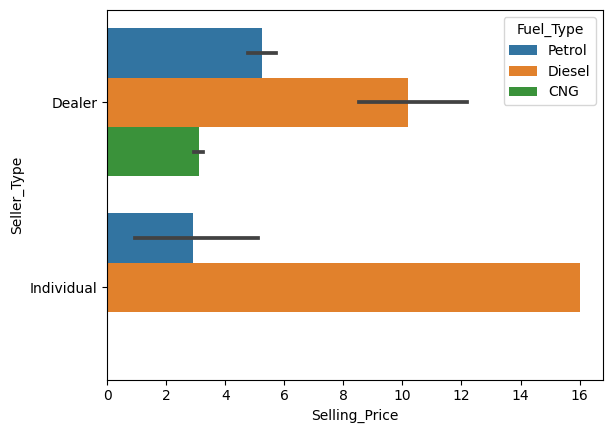

In [130]:
sns.barplot(df, x = df.Selling_Price, y = df.Seller_Type, hue = df.Fuel_Type)

Dealer sells all type of fuel cars with diesel at maximum.
Individuals sell only diesel with few petrol

<AxesSubplot:xlabel='Selling_Price', ylabel='Seller_Type'>

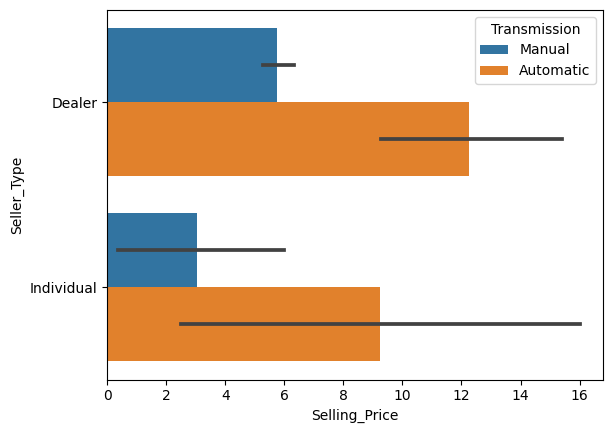

In [131]:
sns.barplot(df, x = df.Selling_Price, y = df.Seller_Type, hue = df.Transmission)

In [132]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


<AxesSubplot:xlabel='Kms_Driven', ylabel='Seller_Type'>

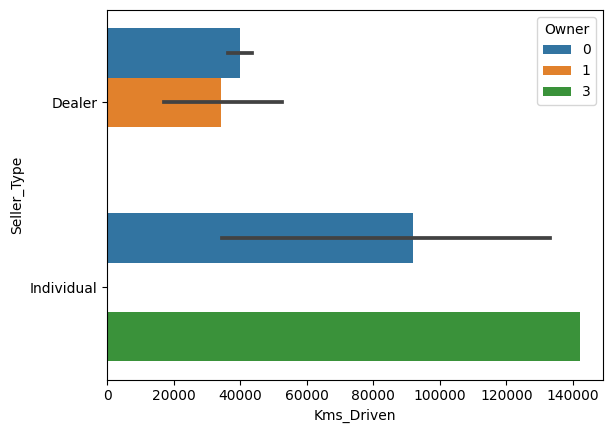

In [133]:
sns.barplot(df, x = df.Kms_Driven, y = df.Seller_Type, hue = df.Owner)

Dealer sells cars driven less than 50k kms
Individuals sells cars driven upto 1.5L kms which is mostly multi-ownered

<AxesSubplot:xlabel='Fuel_Type', ylabel='Selling_Price'>

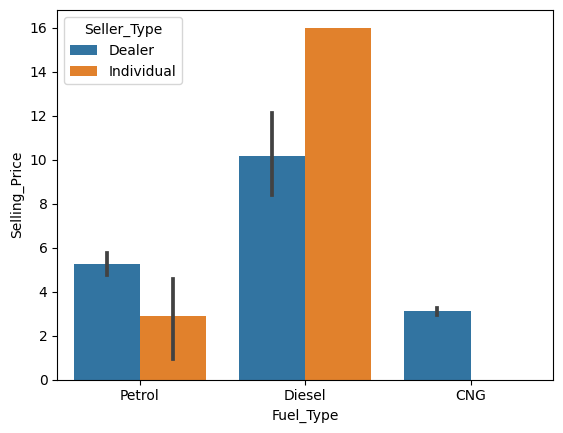

In [134]:
sns.barplot(df, x = df.Fuel_Type, y = df.Selling_Price, hue = df.Seller_Type)

Diesel cars have more resell value than petrol and cng
Dealer sells more diesel cars than petrol where individuals sells diesel to bare minimum when compared to petrol.

Handling Categorical Data using OneHotEncoder

In [139]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [140]:
cols = ['Car_Name', 'Fuel_Type', 'Transmission', 'Seller_Type']
for col in cols:
    df = pd.concat([df, pd.get_dummies(df[col], drop_first=True)], axis = 1)

In [142]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'alto 800',
       'alto k10', 'amaze', 'baleno', 'brio', 'camry', 'ciaz', 'city',
       'corolla', 'corolla altis', 'creta', 'dzire', 'elantra', 'eon',
       'ertiga', 'etios cross', 'etios g', 'etios gd', 'etios liva',
       'fortuner', 'grand i10', 'i10', 'i20', 'ignis', 'innova', 'jazz',
       'land cruiser', 'omni', 'ritz', 's cross', 'swift', 'sx4', 'verna',
       'vitara brezza', 'wagon r', 'xcent', 'Diesel', 'Petrol', 'Manual',
       'Individual'],
      dtype='object')

In [144]:
df.drop(columns = ['Car_Name','Fuel_Type','Seller_Type','Transmission'], inplace = True)

In [145]:
y = df.Selling_Price
x = df.drop(columns = ['Selling_Price'])

In [146]:
x.head(), y.head()

(   Year  Present_Price  Kms_Driven  Owner  alto 800  alto k10  amaze  baleno  \
 0  2014           5.59       27000      0         0         0      0       0   
 1  2013           9.54       43000      0         0         0      0       0   
 2  2017           9.85        6900      0         0         0      0       0   
 3  2011           4.15        5200      0         0         0      0       0   
 4  2014           6.87       42450      0         0         0      0       0   
 
    brio  camry  ...  swift  sx4  verna  vitara brezza  wagon r  xcent  Diesel  \
 0     0      0  ...      0    0      0              0        0      0       0   
 1     0      0  ...      0    1      0              0        0      0       1   
 2     0      0  ...      0    0      0              0        0      0       0   
 3     0      0  ...      0    0      0              0        1      0       0   
 4     0      0  ...      1    0      0              0        0      0       1   
 
    Petrol  Manual

In [147]:
x.shape, y.shape

((200, 44), (200,))

Lets start building our model
1. Spliting dataset into training and testing sets
2. Trying multiple Regression model for comparision
3. Enhancing the best performing model for maximum performance
4. Analysing the model performance
5. Exporting Pickle file

In [148]:
from sklearn.model_selection import train_test_split

In [150]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.83, random_state=10)

### Trying out below mentioned models
1. Linear Regression
2. Ridge Regression
3. Lasso Regression
4. Decision Tree Regression
5. Random Forest

### Linear Regression

In [153]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

In [154]:
lr_model.fit(xtrain, ytrain)

LinearRegression()

In [155]:
lr_model.score(xtrain, ytrain), lr_model.score(xtest, ytest)

(0.9505583960395565, 0.6438454269269129)

In [164]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr_ypred = lr_model.predict(xtest)

lr_mae = mean_absolute_error(ytest, lr_ypred)
lr_mse = mean_squared_error(ytest, lr_ypred)
lr_r2 = r2_score(ytest, lr_ypred)
lr_mae, lr_mse, lr_r2

(1.8850774164937605, 9.887453823308718, 0.6438454269269129)

### Ridge Regression

In [161]:
from sklearn.linear_model import RidgeCV
rd_model = RidgeCV()
rd_model.fit(xtrain, ytrain)

RidgeCV()

In [162]:
rd_model.score(xtrain, ytrain), rd_model.score(xtest, ytest)

(0.9415884571846834, 0.8891930677733674)

In [165]:
rd_ypred = rd_model.predict(xtest)

rd_mae = mean_absolute_error(ytest, rd_ypred)
rd_mse = mean_squared_error(ytest, rd_ypred)
rd_r2 = r2_score(ytest, rd_ypred)
rd_mae, rd_mse, rd_r2

(1.3908894624463533, 3.0761880052246267, 0.8891930677733674)

### Lasso Regression

In [166]:
from sklearn.linear_model import LassoCV
lasso_model = LassoCV()
lasso_model.fit(xtrain, ytrain)

LassoCV()

In [167]:
lasso_model.score(xtrain, ytrain), lasso_model.score(xtest, ytest)

(0.6993290923577049, 0.6816343183141262)

In [168]:
lasso_ypred = lasso_model.predict(xtest)

lasso_mae = mean_absolute_error(ytest, lasso_ypred)
lasso_mse = mean_squared_error(ytest, lasso_ypred)
lasso_r2 = r2_score(ytest, lasso_ypred)
lasso_mae, lasso_mse, lasso_r2

(2.4035001478264233, 8.838370231874874, 0.6816343183141262)

### Decision Tree 

In [169]:
from sklearn.tree import DecisionTreeRegressor
dc_model = DecisionTreeRegressor()
dc_model.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [170]:

dc_model.score(xtrain, ytrain), dc_model.score(xtest, ytest)

(1.0, 0.9263110707478075)

In [171]:
dc_ypred = dc_model.predict(xtest)

dc_mae = mean_absolute_error(ytest, dc_ypred)
dc_mse = mean_squared_error(ytest, dc_ypred)
dc_r2 = r2_score(ytest, dc_ypred)
dc_mae, dc_mse, dc_r2

(1.0282352941176474, 2.045729411764706, 0.9263110707478075)

### Random Forest

In [172]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(xtrain, ytrain)

RandomForestRegressor()

In [173]:
rf_model.score(xtrain, ytrain), rf_model.score(xtest, ytest)

(0.9788689349923908, 0.967030787416461)

In [175]:
rf_ypred = rf_model.predict(xtest)

rf_mae = mean_absolute_error(ytest, rf_ypred)
rf_mse = mean_squared_error(ytest, rf_ypred)
rf_r2 = r2_score(ytest, rf_ypred)
rf_mae, rf_mse, rf_r2

(0.7328529411764708, 0.915281149411764, 0.967030787416461)

As expected RandomForest performs well in prediction with minimum MAE, MSE and maximum R2 score.

### Hyper Tunning

In [177]:
from sklearn.model_selection import RandomizedSearchCV

In [184]:
n_estimators = [int(x) for x in np.linspace(50,100,10)]
max_depth = [int(x) for x in np.linspace(10,40,5)]
min_samples_leaf = [2,4,6,8]
min_samples_split = [5,10,15,20]
max_features = ['auto','sqrt']


parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'min_samples_leaf' : min_samples_leaf,
    'max_features' : max_features,
    'min_samples_split' : min_samples_split
}

In [185]:
randomcv = RandomizedSearchCV(estimator = rf_model, param_distributions = parameters, scoring = 'neg_mean_squared_error', n_iter = 10, cv = 10, verbose = 2)

In [186]:
randomcv.fit(xtrain, ytrain)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=77; total time=   0.1s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=77; total time=   0.1s
[CV] END max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=77; total time=   0.0s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=77; total time=   0.1s
[CV] END max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=77; total time=   0.0s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=77; total time=   0.2s
[CV] END max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=77; total time=   0.0s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=77; total time=   0.1s
[CV] END max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=77; total time=   0.0s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=77; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=50; total time=   0.0s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitl

[CV] END max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=50; total time=   0.0s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitl

[CV] END max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=50; total time=   0.0s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitl

[CV] END max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=6, min_samples_split=20, n_estimators=72; total time=   0.1s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=6, min_samples_split=20, n_estimators=72; total time=   0.1s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=6, min_samples_split=20, n_estimators=72; total time=   0.0s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=6, min_samples_split=20, n_estimators=72; total time=   0.0s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=6, min_samples_split=20, n_estimators=72; total time=   0.0s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=6, min_samples_split=20, n_estimators=72; total time=   0.0s
[CV] END max_depth=40, max_features=sqrt

c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=77; total time=   0.0s
[CV] END max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=77; total time=   0.1s
[CV] END max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=77; total time=   0.1s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=77; total time=   0.2s
[CV] END max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=77; total time=   0.1s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=77; total time=   0.1s
[CV] END max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=77; total time=   0.1s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=77; total time=   0.1s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=77; total time=   0.1s
[CV] END max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=77; total time=   0.1s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=66; total time=   0.1s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=66; total time=   0.1s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=66; total time=   0.2s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=66; total time=   0.1s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=66; total time=   0.1s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=66; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=66; total time=   0.1s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=66; total time=   0.1s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=66; total time=   0.0s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=66; total time=   0.0s
[CV] END max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=88; total time=   0.1s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=88; total time=   0.1s
[CV] END max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=88; total time=   0.1s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=88; total time=   0.1s
[CV] END max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=88; total time=   0.1s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=88; total time=   0.1s
[CV] END max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=88; total time=   0.1s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=88; total time=   0.1s
[CV] END max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=88; total time=   0.1s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=88; total time=   0.1s
[CV] END max_depth=32, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=88; total time=   0.1s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=32, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=88; total time=   0.2s
[CV] END max_depth=32, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=88; total time=   0.1s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=32, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=88; total time=   0.1s
[CV] END max_depth=32, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=88; total time=   0.1s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=32, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=88; total time=   0.1s
[CV] END max_depth=32, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=88; total time=   0.1s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=32, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=88; total time=   0.1s
[CV] END max_depth=32, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=88; total time=   0.1s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=32, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=88; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=61; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=61; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=61; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=61; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=61; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=61; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=61; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_sa

c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=40, max_features=auto, min_samples_leaf=8, min_samples_split=20, n_estimators=77; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=8, min_samples_split=20, n_estimators=77; total time=   0.1s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=40, max_features=auto, min_samples_leaf=8, min_samples_split=20, n_estimators=77; total time=   0.2s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=40, max_features=auto, min_samples_leaf=8, min_samples_split=20, n_estimators=77; total time=   0.1s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=8, min_samples_split=20, n_estimators=77; total time=   0.1s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=40, max_features=auto, min_samples_leaf=8, min_samples_split=20, n_estimators=77; total time=   0.2s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=8, min_samples_split=20, n_estimators=77; total time=   0.0s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=40, max_features=auto, min_samples_leaf=8, min_samples_split=20, n_estimators=77; total time=   0.1s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=8, min_samples_split=20, n_estimators=77; total time=   0.0s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=40, max_features=auto, min_samples_leaf=8, min_samples_split=20, n_estimators=77; total time=   0.1s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [10, 17, 25, 32, 40],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 4, 6, 8],
                                        'min_samples_split': [5, 10, 15, 20],
                                        'n_estimators': [50, 55, 61, 66, 72, 77,
                                                         83, 88, 94, 100]},
                   scoring='neg_mean_squared_error', verbose=2)

In [187]:
randomcv.best_params_

{'n_estimators': 88,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 32}

In [192]:
randomcv_ypred = randomcv.predict(xtest)

In [194]:
randomcv_mae = mean_absolute_error(ytest, randomcv_ypred)
randomcv_mse = mean_squared_error(ytest, randomcv_ypred)
randomcv_r2 = r2_score(ytest, randomcv_ypred)
randomcv_mae, randomcv_mse, randomcv_r2

(1.0168801193770458, 1.9610427196186866, 0.9293615580851171)

importing out pickle file

In [ ]:
import pickle
pickle.dump(rf_model, open('car_price.pkl','wb'))